<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Gradients Applied to Machine Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

### Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$: 

In [3]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$... 

In [4]:
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (e.g., at $y = 0$):

In [5]:
zs_wrt_x = f(xs, 0)

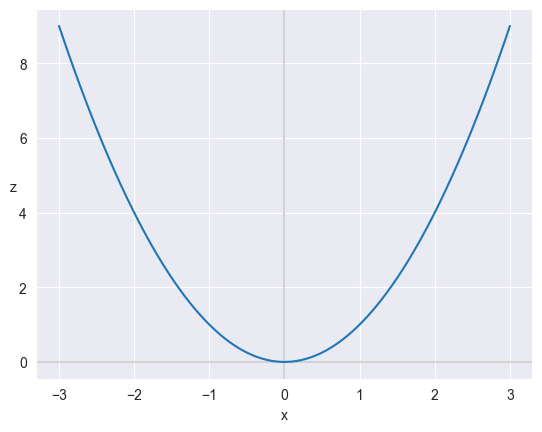

In [6]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [8]:
def delz_delx(my_x, my_y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*my_x

In [9]:
x_samples = [-2, -1, 0, 1, 2]

In [10]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [11]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y) 
    plt.scatter(my_x, my_z, c=col, zorder=3) 
    
    tangent_m = fprime(my_x, my_y) # Slope is partial derivative of f(x, y) w.r.t. x
    tangent_b = my_z - tangent_m*my_x # Line is z=mx+b, so b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b
    
    plt.plot(my_xs, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3)

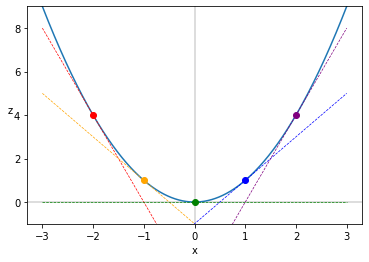

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$. 

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value. 

**Return to slides here.**

Now let's plot $z$ with respect to $y$ by varying $y$...

In [11]:
ys = np.linspace(-3, 3, 1000)

...while holding $x$ constant (e.g., at $x$ = 0): 

In [12]:
zs_wrt_y = f(0, ys)

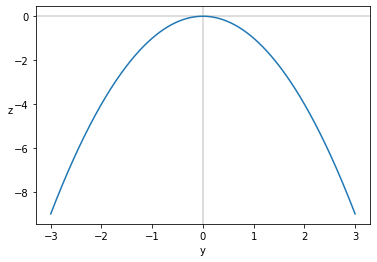

In [13]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$: 

In [14]:
zs_wrt_y = f(2, ys)

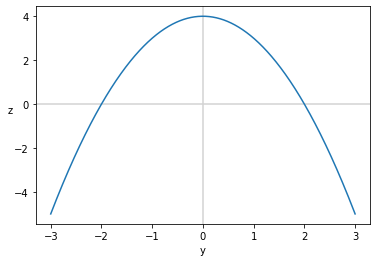

In [15]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [16]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [17]:
y_samples = [-2, -1, 0, 1, 2]

In [18]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

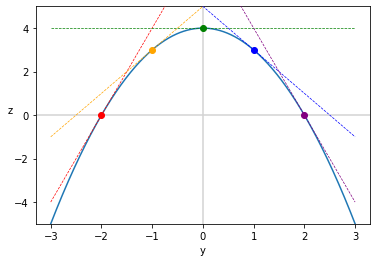

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating $\frac{\partial z}{\partial y} = -2y$. 

That is, the slope of $z$ along the $y$ axis is *twice* the $y$ value *and inverted*, resulting in the parabolic curve opening downward.

**Exercises**: Use pencil and paper to determine: 

* The value of $z$,
* The slope of $z$ with respect to $x$, 
* And the slope of $z$ with respect to $y$

...at the points where: 

1. $x = 3, y = 0$
2. $x = 2, y = 3$
3. $x = -2, y = -3$

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation library to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point $(x, y, z)$:

In [12]:
x = torch.tensor(0.).requires_grad_() 
x

tensor(0., requires_grad=True)

In [13]:
y = torch.tensor(0.).requires_grad_() 
y

tensor(0., requires_grad=True)

In [14]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [15]:
z.backward() # Autodiff

As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the $x$ and $y$ axes: 

In [16]:
x.grad

tensor(0.)

In [17]:
y.grad

tensor(-0.)

**Exercise**: Repeat the most recent pencil-and-paper exercises using PyTorch (or TensorFlow, if you prefer).

**Return to slides here.**

### Partial Derivatives of a Cylinder's Volume

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [18]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [19]:
# Let's say the radius is 3 meters...
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [28]:
# ...and length is 5 meters:
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [29]:
# Then the volume of the cylinder is 141.4 cubic meters: 
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [30]:
v.backward()

In [31]:
l.grad

tensor(28.2743)

As derived on the slides: $$\frac{\partial v}{\partial l} = \pi r^2$$

In [32]:
math.pi * 3**2

28.274333882308138

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of 28.27$\text{m}^3$. We can prove this to ourselves: 

In [33]:
cylinder_vol(3, 6)

169.64600329384882

In [34]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [35]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

**Return to slides here.**

For changes in $v$ with respect to $r$ we have the following from the slides: $$\frac{\partial v}{\partial r} = 2 \pi r l$$

In [36]:
r.grad

tensor(94.2478)

In [37]:
2 * math.pi * 3 * 5

94.24777960769379

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 \times 10^{-6}$:

In [38]:
delta = 1e-6

In [39]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta # Dividing by delta restores scale

94.24779531741478

**Return to slides here.**

### Gradients of Cost w.r.t. Model Parameters

See the standalone notebooks: 

* [Single-Point Regression Gradient](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/single-point-regression-gradient.ipynb)
* [Batch Regression Gradient](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/batch-regression-gradient.ipynb)

## Segment 3: Integrals

In [40]:
from scipy.integrate import quad # "quadrature" = numerical integration (as opposed to symbolic)

From the slides: $$ \int_1^2 \frac{x}{2} dx = \frac{3}{4} $$

In [41]:
def g(x):
    return x/2

In [42]:
quad(g, 1, 2) 

(0.75, 8.326672684688674e-15)

The second output of `quad` is an estimate of the absolute error of the integral, which in this case is essentially zero.

**Return to the slides here.**

In [43]:
def h(x):
    return 2*x

In [44]:
quad(h, 3, 4)

(7.0, 7.771561172376096e-14)

**Return to the slides here.**

### Area Under the ROC Curve

When we don't have a function but we do have $(x, y)$ coordinates, we can use the scikit-learn library's `auc()` method, which uses a numerical approach (the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)) to find the area under the curve described by the coordinates: 

In [45]:
from sklearn.metrics import auc

From the slides, the $(x, y)$ coordinates of our hot dog-detecting ROC curve are: 

* (0, 0)
* (0, 0.5)
* (0.5, 0.5)
* (0.5, 1)
* (1, 1)

In [46]:
xs = [0, 0,   0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1,   1]

In [47]:
auc(xs, ys)

0.75